### 加载数据、数据概览

In [70]:
# 加载数据分析需要使用的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataframe 不采用科学计数，保留小数点后2位
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [71]:
# 加载数据
df = pd.read_csv('/Users/huanglong/Documents/data/order_info_2016.csv', index_col='id')
df.head()

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
1,232148841,2794924,268,110001,35300,35300,9058255c90,3,2016-01-01 12:53:02,2016-01-01 12:53:24
2,222298971,1664684,801,330001,51200,49900,e0e6019897,2,2016-01-01 21:42:51,2016-01-01 21:43:30
3,211494392,2669372,934,220002,62100,62100,9058255c90,3,2016-01-01 14:10:13,2016-01-01 14:11:18
4,334575272,1924727,422,230001,50600,42000,46d5cea30d,2,2016-01-01 17:43:35,2016-01-01 17:43:53
5,144825651,4148671,473,130006,149100,142000,6ff1752b69,2,2016-01-01 18:52:04,2016-01-01 18:52:47


加载之前先用文本编辑器看下数据的格式，首行是什么，分隔符是什么等。加载好数据之后，第一步先分别使用describe和info方法看下数据的大概分布

In [72]:
df.describe()

,orderId,userId,productId,cityId,price,payMoney,deviceType
count,104557.00,104557.00,104557.00,104557.00,104557.00,104557.00,104557.00
mean,299334110.34,3270527.02,504.57,154410.95,91673.50,86866.89,2.39
std,51498178.17,41382084.91,288.13,72197.16,91588.36,90720.28,0.65
min,103562686.00,29306.00,0.00,30000.00,600.00,-1000.00,1.00
25%,263362656.00,2179538.00,254.00,100011.00,37900.00,33600.00,2.00
50%,298982775.00,2705995.00,507.00,150001.00,59200.00,55000.00,2.00
75%,334997153.00,3271237.00,758.00,220002.00,108000.00,104000.00,3.00
max,487142986.00,3072938760.00,1000.00,380001.00,2295600.00,2294200.00,6.00


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   orderId     104557 non-null  int64 
 1   userId      104557 non-null  int64 
 2   productId   104557 non-null  int64 
 3   cityId      104557 non-null  int64 
 4   price       104557 non-null  int64 
 5   payMoney    104557 non-null  int64 
 6   channelId   104549 non-null  object
 7   deviceType  104557 non-null  int64 
 8   createTime  104557 non-null  object
 9   payTime     104557 non-null  object
dtypes: int64(7), object(3)
memory usage: 8.8+ MB


### 数据预处理
#### order_id
首先要做数据清洗。order_id在一个系统里是唯一值，先看下有没有重复值。

In [74]:
# 注意：对一列取size属性的时候，返回的是行数，如果对于dataframe使用size，返回的是行乘以列的结果，也就是总的元素数
df.orderId.unique().size

104530

In [75]:
df.orderId.size

104557

#### userId

In [76]:
# 如果有重复值，一般最后处理，因为其他的列可能会影响到删除哪一条重复的记录
# 先处理其他的列
# userId我们只要从上面的describe和info看下值是不是在正常范围就行了
# 对于订单数据，一个用户有可能有多个订单，重复值是合理的
df.userId.unique().size

102672

#### productId

In [77]:
# productId最小值是0，先来看下值为0的记录数量；# 177条记录，数量不多，可能是因为商品的上架下架引起的，处理完其他值的时候我们把这些删掉
df.productId[(df.productId == 0)].size

177

#### cityId

In [78]:
# cityId类似于userId，值都在正常范围，不需要处理
df.cityId.unique().size

331

#### price

In [79]:
# price没有空值，且都大于0，注意单位是分，我们把它变成元
df.price = df.price / 100

#### payMoney

In [80]:
# payMoney有负值，我们下单不可能是负值，所以这里对于负值的记录要删除掉
# 展示负值的记录
df[df.payMoney < 0]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
25344,288096069,2145955,511,230014,111.00,-1000,df9f79c426,2,2016-03-11 21:32:54,2016-03-11 21:33:10
55044,296608442,4073997,385,120006,111.00,-1000,cbccc0808e,2,2016-05-24 08:52:04,2016-05-24 08:52:23
66897,316685479,1949907,554,60019,2084.00,-1000,9058255c90,3,2016-03-31 11:57:46,2016-03-31 11:57:46
72556,323229098,2894042,548,220008,114.00,-1000,41a4e91d29,2,2016-08-09 14:24:13,2016-08-09 14:24:26
81494,311194385,3370399,797,40001,116.00,-990,ea5648bbe2,1,2016-09-06 11:20:43,2016-09-06 11:21:31
87878,324068352,1873953,602,260003,292.00,-1000,9058255c90,3,2016-10-05 10:47:05,2016-10-05 10:47:05


In [81]:
# 删除负值的记录
df.drop(index=df[df.payMoney < 0].index, inplace=True)

# 再看下，已经去除
df[df.payMoney < 0].index

Int64Index([], dtype='int64', name='id')

In [82]:
# 变成元
df.payMoney = df.payMoney / 100

#### channelId

In [83]:
# channelId根据info的结果，有些null的数据，可能是端的bug等原因，在下单的时候没有传channelId字段
# 数据量大的时候，删掉少量的null记录不会影响统计结果，这里我们直接删除
df[df.channelId.isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
19086,284008366,3309847,698,240001,2164.00,2040.00,NaN,2,2016-03-08 22:36:12,2016-03-08 22:36:50
38175,287706890,2799815,823,70001,760.00,749.00,NaN,3,2016-06-10 22:30:18,2016-06-10 22:30:47
48073,248057459,3970570,142,130001,474.00,400.00,NaN,2,2016-03-30 12:59:03,2016-03-30 12:59:13
75949,266847859,3761925,649,120006,257.00,257.00,NaN,2,2016-08-19 08:46:22,2016-08-19 08:46:39
100952,283627429,4156620,269,280001,484.00,410.00,NaN,2,2016-12-13 13:24:37,2016-12-13 14:47:08
100953,346836140,3751526,738,100013,105.00,80.00,NaN,1,2016-12-13 13:47:34,2016-12-13 13:47:44
100954,352853915,2229389,786,240001,474.00,440.00,NaN,2,2016-12-13 16:54:09,2016-12-13 16:55:00
100955,379473081,4531810,18,180009,146.00,50.00,NaN,3,2016-12-13 20:18:22,2016-12-13 20:18:34


In [84]:
# 删除
df.drop(index=df[df.channelId.isnull()].index, inplace=True)

# 再查看，已经没有null数据
df[df.channelId.isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


createTime 和 payTime 都没有 null，不过我们是要统计 2016 年的数据，所以把非2016年的删掉。payTime 类似，这里只按创建订单的时间算，就不处理了
先把 createTime 和 payTime 转换成 datetime 格式。

In [85]:
df.createTime = pd.to_datetime(df.createTime)
df.payTime = pd.to_datetime(df.payTime)
df.dtypes

orderId                int64
userId                 int64
productId              int64
cityId                 int64
price                float64
payMoney             float64
channelId             object
deviceType             int64
createTime    datetime64[ns]
payTime       datetime64[ns]
dtype: object

In [86]:
import datetime
startTime = datetime.datetime(2016, 1, 1)
endTime = datetime.datetime(2016, 12, 31, 23, 59, 59)

# 有16年之前的数据，需要删掉
df[df.createTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
53,263312190,2497737,583,180015,336.00,336.00,9058255c90,3,2015-08-14 09:40:34,2016-01-01 14:47:14
18669,188208169,3277974,82,60021,752.00,740.00,9058255c90,3,2015-11-02 20:17:25,2016-01-19 20:06:35
36650,254118088,1861372,64,210010,249.00,249.00,9058255c90,2,2015-02-14 12:20:36,2016-02-28 13:38:41
71638,203314910,3207233,302,180011,662.00,580.00,41a4e91d29,1,2015-11-19 10:36:39,2016-08-07 12:24:35
88692,283989279,2830413,290,330005,467.00,460.00,df9f79c426,2,2015-12-26 11:19:16,2016-10-01 07:42:43


In [87]:
df.drop(index=df[df.createTime < startTime].index, inplace=True)

# 查看数据，已经删除
df[df.createTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [88]:
# payTime早于createTime的也需要删掉
df.drop(index=df[df.createTime > df.payTime].index, inplace=True)

# 处理16年之后的数据
df[df.createTime > endTime]


# 看下支付时间有没有16年以前的，支付时间在16年之后的这里就不需要处理
df[df.payTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [89]:
# 把orderId重复的记录删掉
df.orderId.unique().size
df.orderId.size
df.drop(index=df[df.orderId.duplicated()].index, inplace=True)
df.orderId.unique().size

104506

In [90]:
# 把productId为0的也删除掉
df.drop(index=df[df.productId==0].index, inplace=True)

### 数据分析

In [91]:
# 一般都是先看下数据的总体情况总体情况
# 总订单数，总下单用户，总销售额，有流水的商品数
print(df.orderId.count())
print(df.userId.unique().size)
print(df.payMoney.sum()/100)
print(df.productId.unique().size)

104329
102447
906663.997
1000


In [92]:
# 分析数据可以从两方面开始考虑，一个是维度，一个是指标，维度可以看做x轴，指标可以看成是y轴，同一个维度可以分析多个指标，同一个维度也可以做降维升维。

# 按照商品的productId
# 先看下商品销量的前十和后十个
productId_orderCount = df.groupby('productId').count()['orderId'].sort_values(ascending=False)
print(productId_orderCount.head(10))
print(productId_orderCount.tail(10))
# 销售额
productId_turnover = df.groupby('productId').sum()['payMoney'].sort_values(ascending=False)
print(productId_turnover.head(10))
print(productId_turnover.tail(10))

productId
895    354
762    350
103    334
587    303
385    302
60     301
38     301
403    297
345    292
823    288
Name: orderId, dtype: int64
productId
948     29
856     28
621     27
272     26
563     24
347     21
597     19
468     18
986     16
1000    13
Name: orderId, dtype: int64
productId
385   427522.10
61    361572.00
103   344641.20
405   339525.00
720   322405.10
345   320162.20
698   318458.60
182   296600.00
383   280790.00
396   269556.00
Name: payMoney, dtype: float64
productId
310    22879.00
847    22869.00
454    22535.00
817    22509.00
597    21847.00
408    18111.00
986    14784.00
964    14238.00
1000   12169.00
347    12070.00
Name: payMoney, dtype: float64


In [93]:
# 看下销量和销售额最后100个的交集，如果销量和销售额都不行，这些商品需要看看是不是要优化或者下架
problem_productIds = productId_turnover.tail(100).index.intersection(productId_orderCount.tail(100).index)

# 城市的分析可以和商品维度类似
cityId_orderCount = df.groupby('cityId').count()['orderId'].sort_values(ascending=False)
cityId_payMoney = df.groupby('cityId').sum()['payMoney'].sort_values(ascending=False)

In [94]:
# price
# 对于价格，可以看下所有商品价格的分布，这样可以知道什么价格的商品卖的最好
# 先按照100的区间取分桶，价格是分，这里为了好看把他转成元
bins = np.arange(0, 25000, 100)
pd.cut(df.price, bins).value_counts()

(400, 500]        14791
(300, 400]        10737
(200, 300]         9966
(500, 600]         9189
(600, 700]         8777
(100, 200]         7123
(700, 800]         7111
(1000, 1100]       4772
(900, 1000]        3218
(2000, 2100]       2815
(800, 900]         2813
(1700, 1800]       2221
(1300, 1400]       1865
(1900, 2000]       1814
(1100, 1200]       1790
(1600, 1700]       1783
(1400, 1500]       1637
(3000, 3100]       1197
(1200, 1300]       1185
(0, 100]           1025
(2700, 2800]        821
(2900, 3000]        743
(2600, 2700]        708
(1800, 1900]        657
(2100, 2200]        622
(1500, 1600]        579
(4000, 4100]        509
(2400, 2500]        476
(3900, 4000]        363
(2200, 2300]        285
(2300, 2400]        284
(3100, 3200]        246
(3700, 3800]        214
(2500, 2600]        189
(2800, 2900]        179
(5000, 5100]        153
(3300, 3400]        120
(3600, 3700]        108
(3400, 3500]        106
(3200, 3300]        104
(4100, 4200]         92
(3800, 3900]    

### 数据可视化

(array([9.9200e+02, 7.0420e+03, 9.9660e+03, 1.0745e+04, 1.4758e+04,
        9.2490e+03, 8.7730e+03, 7.1320e+03, 2.8580e+03, 3.2110e+03,
        4.7370e+03, 1.8420e+03, 1.1770e+03, 1.8600e+03, 1.6440e+03,
        5.8700e+02, 1.7750e+03, 2.2170e+03, 6.6800e+02, 1.8000e+03,
        2.8160e+03, 6.4000e+02, 2.8400e+02, 2.8200e+02, 4.7200e+02,
        1.9600e+02, 7.0300e+02, 8.2200e+02, 1.8300e+02, 7.3400e+02,
        1.1970e+03, 2.5600e+02, 1.0300e+02, 1.2000e+02, 1.0700e+02,
        4.1000e+01, 1.0600e+02, 2.1400e+02, 9.0000e+01, 3.6000e+02,
        5.0700e+02, 9.9000e+01, 6.8000e+01, 2.4000e+01, 3.0000e+01,
        1.2000e+01, 5.2000e+01, 4.5000e+01, 1.5000e+01, 6.6000e+01,
        1.5300e+02, 5.0000e+01, 1.6000e+01, 2.2000e+01, 1.7000e+01,
        1.0000e+00, 2.2000e+01, 1.0000e+01, 1.0000e+01, 4.0000e+01,
        4.8000e+01, 1.6000e+01, 7.0000e+00, 1.1000e+01, 2.0000e+00,
        6.0000e+00, 3.0000e+00, 4.7000e+01, 6.0000e+00, 2.8000e+01,
        3.2000e+01, 6.0000e+00, 3.0000e+00, 0.00

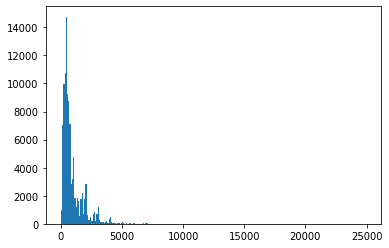

In [95]:
# 直方图
# 觉得尺寸小的话可以先设置下figsize，觉得后面的值没有必要展示，可以不用25000，改成10000：plt.figure(figsize=(16, 16))
plt.hist(df['price'], bins)

In [27]:
# 很多价格区间没有商品，如果有竞争对手的数据，可以看看是否需要补商品填充对应的价格区间
price_cut_count = pd.cut(df.price, bins).value_counts()
zero_cut_result = (price_cut_count == 0)
zero_cut_result[zero_cut_result.values].index

CategoricalIndex([(11300, 11400], (10800, 10900], (10600, 10700],
                  (10700, 10800], (11800, 11900], (10500, 10600],
                  (11700, 11800], (11400, 11500], (11100, 11200],
                  (11200, 11300],
                  ...
                  (16600, 16700], (16500, 16600], (16400, 16500],
                  (16300, 16400], (16200, 16300], (16100, 16200],
                  (16000, 16100], (15900, 16000], (15800, 15900],
                  (12400, 12500]],
                 categories=[(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600], (600, 700], (700, 800], ...], ordered=True, dtype='category', length=153)

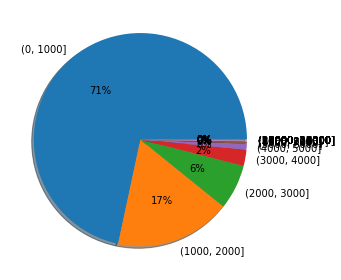

In [98]:
# 按照1000分桶在看下
bins = np.arange(0, 25000, 1000)
price_cut = pd.cut(df.price, bins).value_counts()


# 看看1000分桶的时候5000以下的饼图
m = plt.pie(x=price_cut.values, labels=price_cut.index, autopct='%d%%', shadow=True)
plt.tight_layout() # 自动调整子图间隔

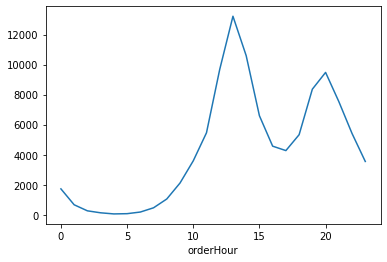

In [29]:
# channelId
# 渠道的分析类似于productId，可以给出成交量最多的渠道，订单数最多的渠道等，渠道很多时候是需要花钱买流量的，所以还需要根据渠道的盈利情况和渠道成本进行综合比较，同时也可以渠道和商品等多个维度综合分析，看看不同的卖的最好的商品是否相同

# 下单时间分析
# 按小时的下单量分布，可以按时间做推广
# 中午12， 13， 14点下单比较多，应该是午休的时候，然后是晚上20点左右，晚上20点左右几乎是所有互联网产品的一个高峰，下单高峰要注意网站的稳定性、可用性
df['orderHour'] = df.createTime.dt.hour
df.groupby('orderHour').count()['orderId'].plot()

In [30]:
# 按照星期来看，周六下单最多，其次是周四周五
df['orderWeek'] = df.createTime.dt.dayofweek
df.groupby('orderWeek').count()['orderId']

orderWeek
0    12503
1    12484
2    12932
3    13794
4    16198
5    19496
6    16922
Name: orderId, dtype: int64

In [31]:
# 下单后多久支付
def get_seconds(x):
    return x.total_seconds()
df['payDelta'] = (df['payTime'] - df['createTime']).apply(get_seconds)

bins = [0, 50, 100, 1000, 10000, 100000]
pd.cut(df.payDelta, bins).value_counts()

(0, 50]            79229
(100, 1000]        12899
(50, 100]          10674
(1000, 10000]        968
(10000, 100000]      231
Name: payDelta, dtype: int64

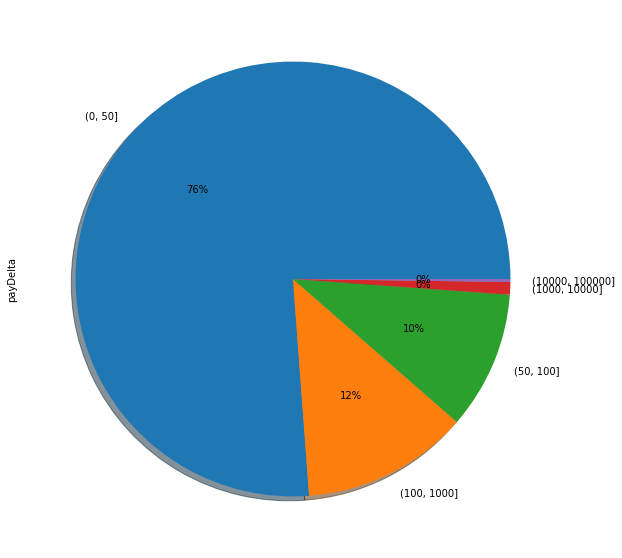

In [32]:
# 饼图看下，有重合的话可以改下bins
# 绝大部分都在十几分钟之内支付完成，说明用户基本很少犹豫，购买的目的性很强
pd.cut(df.payDelta, bins).value_counts().plot(kind='pie', autopct='%d%%', shadow=True, figsize=(10, 10))

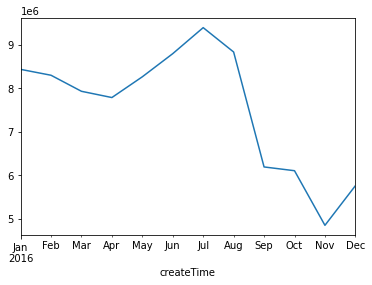

In [33]:
# 月成交额
# 先把创建订单的时间设置为索引
df.set_index('createTime', inplace=True)
turnover = df.resample('M').sum()['payMoney']
order_count = df.resample('M').count()['orderId']

turnover.plot()
